In [72]:
from scipy.stats import zscore
import pandas as pd

In [73]:
# Read in CSV
df = pd.read_csv("./Airbnb_Open_Data.csv")
df.head()

/var/folders/qv/hlnb1jfx68x_r2g75s1fkjlm0000gq/T/ipykernel_24285/26752806.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [75]:
# try to do this first and show them there's an error:
zscore(df["price"])

TypeError: can only concatenate str (not "float") to str

In [76]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [77]:
# Do these one by one for demonstration
df["price"] = df["price"].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').str.strip().astype(float)
df["price"] = df["price"].astype(float)

In [78]:
# Do these one by one for demonstration
df["service fee"] = df["service fee"].str.replace('$', '')
df["service fee"] = df["service fee"].astype(float)

In [79]:
df["minimum nights"] = df["minimum nights"].astype(float)

In [80]:
# Explain
columns_to_zscore = ["price", "service fee", "minimum nights"]

for col in columns_to_zscore:
    df[f'{col}_zscore'] = zscore(df[col], nan_policy='omit')  # skips NaNs

In [81]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_zscore,service fee_zscore,minimum nights_zscore
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,1.027245,1.024842,0.061013
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,-1.457152,-1.462892,0.715599
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,-0.015960,-0.015483,-0.168093
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN,-0.775752,-0.769342,0.715599
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,-1.270219,-1.266889,0.061013


In [82]:
# Any Z-score > 3 or < -3 is often considered an outlier.
temp = df[(df["price_zscore"] > 3) | (df["service fee_zscore"] > 3) | (df["minimum nights_zscore"] > 3)]
temp.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_zscore,service fee_zscore,minimum nights_zscore
62,1035579,NaN,51930287368,unconfirmed,George,Manhattan,Chelsea,40.74623,-73.99530,United States,...,11/3/2018,0.12,2.0,1.0,NaN,NaN,NaN,0.463432,0.466987,5.624999
166,1093018,* Spacious GARDEN Park Slope Duplex* 6 people max,61571782497,verified,Nicole,Brooklyn,Gowanus,40.66858,-73.99083,United States,...,7/6/2019,NaN,2.0,1.0,52.0,"No candles, smoking or flame of any kind is al...",NaN,-0.757661,-0.754265,4.446743
167,1093570,Convenient cozy cheap apt Manhattan,29280666536,unconfirmed,Agata,Manhattan,Harlem,40.82704,-73.94907,United States,...,11/2/2015,NaN,4.0,1.0,70.0,"You will be sharing a bathroom, so you must be...",NaN,-0.754646,-0.754265,11.876302
168,1094122,Parlor Room In Victorian Townhouse,45745264571,NaN,Heather,NaN,Clinton Hill,40.68843,-73.96408,United States,...,6/24/2019,NaN,3.0,3.0,311.0,NaN,NaN,0.903629,0.904225,4.610390
169,1094675,House On Henry (2nd FLR Suite),44408473243,NaN,James,Brooklyn,Carroll Gardens,40.67830,-74.00135,United States,...,6/18/2019,1.40,5.0,3.0,141.0,-Please no pets -Quiet hours are from 10pm - 8...,NaN,0.653380,0.647913,8.668827


In [83]:
# Just physically look at the numbers that are considered outliers
temp["minimum nights"]

62        180.0
166       144.0
167       371.0
168       149.0
169       273.0
          ...  
101796    300.0
101842    120.0
101980    180.0
102468    120.0
102528    100.0
Name: minimum nights, Length: 412, dtype: float64

<AxesSubplot:>

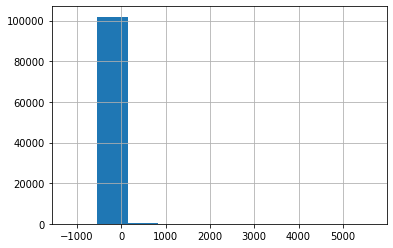

In [84]:
# Show a hist and notice soome look below 0
df["minimum nights"].hist()

In [85]:
df["minimum nights"].describe()

count    102190.000000
mean          8.135845
std          30.553781
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

In [86]:
# Have them decide what they want to do with the outliers. Fill with 0? Fill with blanks? -99?
df[df["minimum nights"] < 0]["minimum nights"]

176       -10.0
352        -5.0
398        -1.0
421       -10.0
441       -12.0
478        -2.0
525        -3.0
42446   -1223.0
42500    -365.0
42538    -200.0
69749    -125.0
91271     -10.0
91357     -10.0
Name: minimum nights, dtype: float64

In [87]:
# Any Z-score > 3 or < -3 is often considered an outlier.
temp = df[(df["price_zscore"] < -3) | (df["service fee_zscore"] < -3) | (df["minimum nights_zscore"] < -3)]
temp.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_zscore,service fee_zscore,minimum nights_zscore
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,NaN,NaN,2.0,4.0,341.0,Smoking is strictly prohibited. Your pets are ...,NaN,1.732766,1.733469,-40.294255
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,7/7/2019,5.91,4.0,4.0,0.0,Please pick up/drop packet with front desk con...,NaN,0.258409,0.255906,-12.212487
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,4/23/2019,1.06,2.0,1.0,157.0,No smoking or pets allowed and we request that...,NaN,-1.629009,-1.628741,-6.812147
69749,39523709,Amazing location! 10ft from L train,62132542936,verified,Giorgia & Benjamin,Brooklyn,Williamsburg,40.71534,-73.94906,United States,...,6/23/2019,1.78,1.0,1.0,46.0,NaN,NaN,-0.896353,-0.889959,-4.357447
